## 이미지 분할 image segmentation

### 이미지 분할
- 이미지 분할 image segmentation은 이미지를 여러 개로 분할하는 것
- 시맨틱 분할 semantic segmentation은 동일 종류의 물체에 속한 픽셀을 같은 세그먼트로 할당
- 시맨틱 분할에서 최고의 성능을 내려면 역시 CNN 기반으로
- 지금은 단순히 색상 분할로 시도

### 실습 - 짱구

In [21]:
# 이미지 읽기
from matplotlib.image import imread
image = imread('./janggu.png')
image.shape

(250, 202, 4)

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

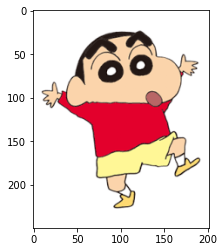

In [23]:
plt.imshow(image);

In [26]:
# 색상별로 클러스터링
from sklearn.cluster import KMeans

X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=8, random_state=13).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

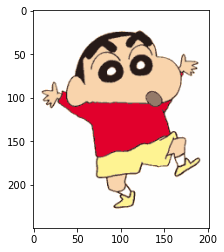

In [27]:
# 결과 - 색상의 종류가 단순하게 됨
plt.imshow(segmented_img);

In [30]:
# 여러개의 군집 비교
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

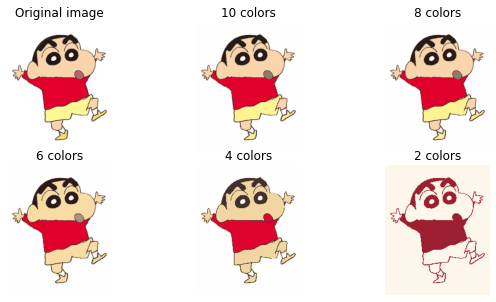

In [31]:
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')
    
plt.show()

### 실습 - MNIST

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits,
                                                   y_digits, random_state=13)

In [33]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr',
                            solver='lbfgs', max_iter=5000, random_state=13)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=13)

- 다중 분류라서

In [35]:
# 결과
log_reg.score(X_test, y_test)

0.9622222222222222

In [38]:
# kmeans -> 전처리
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=13)),
    ('log_reg', LogisticRegression(multi_class='ovr',
                                  solver='lbfgs', max_iter=5000,
                                  random_state=13)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=13)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=13))])

In [39]:
pipeline.score(X_test, y_test)

0.9688888888888889

In [40]:
# Gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=37; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=37; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=38; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=39; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=39; total time=   2.0s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.6s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=71; total time=   2.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=73; total time=   2.5s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=13)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=13))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [41]:
grid_clf.best_params_

{'kmeans__n_clusters': 83}

In [42]:
grid_clf.score(X_test, y_test)

0.9777777777777777